# Create summary plots for locations

This notebook is for creating some summmary plots for the various locations of interest.

The goal is to create barplots of four variables we have summarized over eras and decades:
* Hot day
* Cold day
* Maximum single day precipitation
* Heavy snow days

## Plotting

Run this cell first to set up the environment:

In [1]:
from config import *
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import warnings
# for runtime warning that is happening in DataFrame.plot() 
warnings.simplefilter(action='ignore', category=RuntimeWarning)
# for user warning with pyplot.tight_layout plus added axis
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
# not sure of a better way to change legend title size atm
plt.rcParams["legend.title_fontsize"] = 14

def make_summary_barplot(df, aggr_var, title):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    axes = axes.flatten()

    plot_lu = {
        "hd": {"title": "Hot day", "ylab": "°C",},
        "rx1say": {"title": "Rx1day", "ylab": "mm",},
    }
    colors = ["#1f77b4", "#ff7f0e"]

    for varname, ax in zip(["hd", "rx1say"], axes):
        temp_df = (
            df[df["varname"] == varname]
            .groupby(["scenario", "era"])
            .agg({aggr_var: ["min", "mean", "max"]})
        )
        # drop column multiindex
        temp_df = temp_df.droplevel(0, axis=1).reset_index()
        avg_df = temp_df.pivot("era", "scenario", "mean")
        # error bar limits
        ll = (avg_df - temp_df.pivot("era", "scenario", "min")).to_numpy().T
        ul = (temp_df.pivot("era", "scenario", "max") - avg_df).to_numpy().T
        # holy moly figuring this out was hard-fought. yuck.
        err = np.array([
            [ll[0], ul[0]], #rcp45 limits 
            [ll[1], ul[1]], #rcp85 limits
        ])
        
        avg_df.plot(
            kind="bar", rot=0, yerr=err, ax=ax, capsize=5, legend=False, color=colors
        )  # .legend(loc="upper left")

        ax.set_ylabel(plot_lu[varname]["ylab"], size=14, rotation=0, labelpad=15)
        ax.set_xlabel("Era", size=14)
        ax.set_title((f"{plot_lu[varname]['title']}"), size=14)

    leg_ax = fig.add_axes([0.96, 0.2, 0.02, 0.7])

    handles = [
        mpatches.Patch(color=colors[0], label="RCP 4.5"),
        mpatches.Patch(color=colors[1], label="RCP 8.5"),
    ]

    leg_ax.set_axis_off()
    # Add legend to bottom-right ax
    leg_ax.legend(handles=handles, loc="center", fontsize=14, title="Scenario")

    fig.suptitle(title, size=16, y=1)
    
    
title_str = "{} extremes by era across all models for {}, AK"
tmp_fn = "{}_extremes_barplot_{}.png"

### Era summary plots

## Mean extremes

Plots of mean values of extreme variables

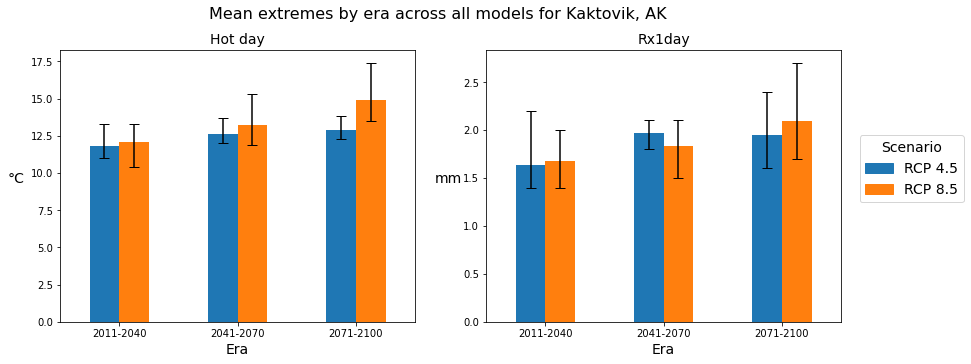

In [4]:
location = "Kaktovik"
df = pd.read_excel(extr_era_summary_fp, location) 
make_summary_barplot(df, "mean", title_str.format("Mean", location))
out_fp = out_dir.joinpath("auxiliary_content", tmp_fn.format("mean", location))
plt.savefig(out_fp, bbox_inches='tight', facecolor="white")

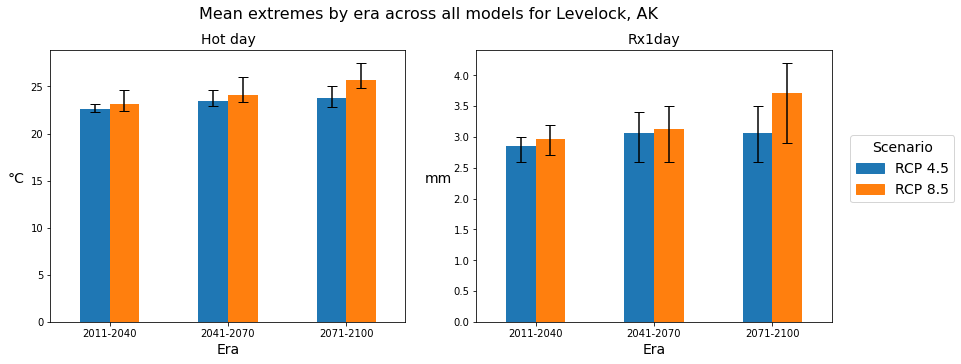

In [5]:
location = "Levelock"
df = pd.read_excel(extr_era_summary_fp, location) 
make_summary_barplot(df, "mean", title_str.format("Mean", location))
out_fp = out_dir.joinpath("auxiliary_content", tmp_fn.format("mean", location))
plt.savefig(out_fp, bbox_inches='tight', facecolor="white")

### Maximum extremes

Plots of maximum values of extreme variables 

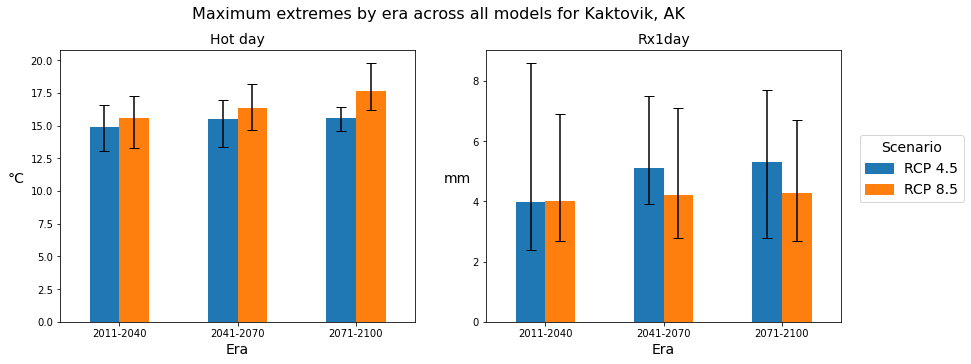

In [6]:
location = "Kaktovik"
df = pd.read_excel(extr_era_summary_fp, location) 
make_summary_barplot(df, "max", title_str.format("Maximum", location))
out_fp = out_dir.joinpath("auxiliary_content", tmp_fn.format("max", location))
plt.savefig(out_fp, bbox_inches='tight', facecolor="white")

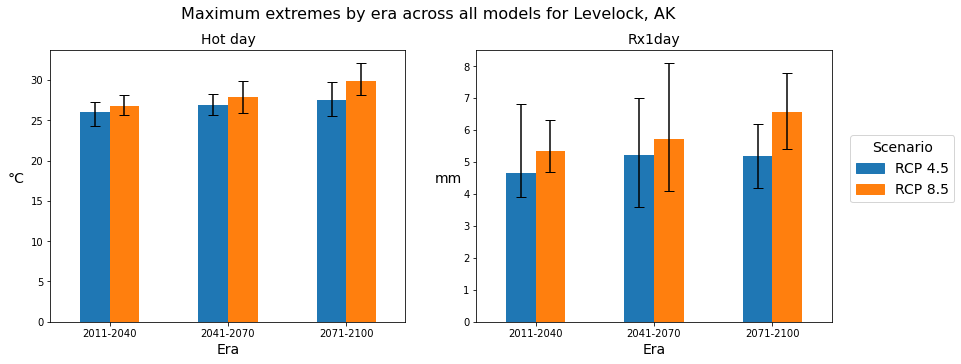

In [7]:
location = "Levelock"
df = pd.read_excel(extr_era_summary_fp, location) 
make_summary_barplot(df, "max", title_str.format("Maximum", location))
out_fp = out_dir.joinpath("auxiliary_content", tmp_fn.format("max", location))
plt.savefig(out_fp, bbox_inches='tight', facecolor="white")

### Decadal summary plots



In [3]:
location = "Kaktovik"
df = pd.read_excel(extr_decade_summary_fp, location, engine="openpyxl") 
# make_summary_barplot(df, "mean", title_str.format("Mean", location))
# out_fp = out_dir.joinpath("auxiliary_content", tmp_fn.format("mean", location))
# plt.savefig(out_fp, bbox_inches='tight', facecolor="white")

In [10]:
# not sure of a better way to change legend title size atm
plt.rcParams["legend.title_fontsize"] = 14

def make_summary_barplot(df, varname, aggr_var, title, ylab):
    colors = ["#d2b48c", "#1f77b4", "#ff7f0e"]
     
    temp_df = (
        df[df["varname"] == varname]
        .groupby(["scenario", "decade"])
        .agg({aggr_var: ["min", "mean", "max"]})
    )
    if varname == "rx1say":
        temp_df = temp_df * 10
    
    if len(np.unique(temp_df["mean"])) < 2:
        print(f"No meaningful variation, skipping location: {' '.join(title.split()[-2:])}, var: {varname}")
        return None

    # drop column multiindex
    temp_df = temp_df.droplevel(0, axis=1).reset_index()
    avg_df = temp_df.pivot("decade", "scenario", "mean")
    # error bar limits
    ll = (avg_df - temp_df.pivot("decade", "scenario", "min")).to_numpy().T
    ul = (temp_df.pivot("decade", "scenario", "max") - avg_df).to_numpy().T
    # holy moly figuring this out was hard-fought. yuck.

    err = np.array([
        [ll[0], ul[0]], #hist limits 
        [ll[1], ul[1]], #rcp45 limits 
        [ll[2], ul[2]], #rcp85 limits
    ])

    fig, ax = plt.subplots(1, figsize=(14, 7))
    avg_df.plot(
        kind="bar", rot=0, yerr=err, ax=ax, capsize=5, legend=False, color=colors, width=1,
    )  # .legend(loc="upper left")

    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(15)
        
    ax.tick_params(axis='both', which='major', labelsize=12)

    ax.set_ylabel(ylab, size=14, rotation=0, labelpad=15)
    ax.set_xlabel("Decade", size=14)

    leg_ax = fig.add_axes([1.05, 0.2, 0.02, 0.7])

    handles = [
        mpatches.Patch(color=colors[0], label="Historical"),
        mpatches.Patch(color=colors[1], label="RCP 4.5"),
        mpatches.Patch(color=colors[2], label="RCP 8.5"),
    ]

    leg_ax.set_axis_off()
    # Add legend to bottom-right ax
    leg_ax.legend(handles=handles, loc="center", fontsize=14, title="Scenario")

    fig.suptitle(title, size=16)
    plt.tight_layout()

Iterate 

In [11]:
tmp_fn = "barplot_{}_{}_{}.png"
title_template = "Mean {} by decade across all models for {}, AK"
plot_lu = {
    "hd": {"title": "Hot day", "ylab": "°C",},
    "rx1say": {"title": "Rx1day", "ylab": "mm",},
    "cd": {"title": "Cold day", "ylab": "°C",},
    "hsd": {"title": "Heavy snow days", "ylab": "Count",},
}

In [12]:
for location in locations:
    df = pd.read_excel(extr_decade_summary_fp, location, engine="openpyxl") 
    for varname in np.unique(df.varname.values):
        title_str = title_template.format(plot_lu[varname]["title"], location)
        ylab = plot_lu[varname]["ylab"]
        make_summary_barplot(df, varname, "mean", title_str, ylab)
        # temp fix for rx1say issue
        if varname == "rx1say":
            varname = "rx1day"
        out_fp = decadal_summary_dir.joinpath(tmp_fn.format("mean", varname, location))
        plt.savefig(out_fp, bbox_inches='tight', facecolor="white")
        plt.close()
    print(f"{location} done")

/tmp/ipykernel_47097/1774649969.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  avg_df = temp_df.pivot("decade", "scenario", "mean")
/tmp/ipykernel_47097/1774649969.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ll = (avg_df - temp_df.pivot("decade", "scenario", "min")).to_numpy().T
/tmp/ipykernel_47097/1774649969.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ul = (temp_df.pivot("decade", "scenario", "max") - avg_df).to_numpy().T
/tmp/ipykernel_47097/1774649969.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  avg_df = temp_df.pivot("decade", "scenario", "mean")
/tmp/ipykernel_47097/1774649969.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ll = (avg_df - temp_df.pivot("decade", "scena

No meaningful variation, skipping location: Kaktovik, AK, var: hsd


/tmp/ipykernel_47097/1774649969.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  avg_df = temp_df.pivot("decade", "scenario", "mean")
/tmp/ipykernel_47097/1774649969.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ll = (avg_df - temp_df.pivot("decade", "scenario", "min")).to_numpy().T
/tmp/ipykernel_47097/1774649969.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ul = (temp_df.pivot("decade", "scenario", "max") - avg_df).to_numpy().T


Kaktovik done


/tmp/ipykernel_47097/1774649969.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  avg_df = temp_df.pivot("decade", "scenario", "mean")
/tmp/ipykernel_47097/1774649969.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ll = (avg_df - temp_df.pivot("decade", "scenario", "min")).to_numpy().T
/tmp/ipykernel_47097/1774649969.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ul = (temp_df.pivot("decade", "scenario", "max") - avg_df).to_numpy().T
/tmp/ipykernel_47097/1774649969.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  avg_df = temp_df.pivot("decade", "scenario", "mean")
/tmp/ipykernel_47097/1774649969.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ll = (avg_df - temp_df.pivot("decade", "scena

No meaningful variation, skipping location: Village, AK, var: hsd


/tmp/ipykernel_47097/1774649969.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  avg_df = temp_df.pivot("decade", "scenario", "mean")
/tmp/ipykernel_47097/1774649969.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ll = (avg_df - temp_df.pivot("decade", "scenario", "min")).to_numpy().T
/tmp/ipykernel_47097/1774649969.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ul = (temp_df.pivot("decade", "scenario", "max") - avg_df).to_numpy().T


Stevens Village done


/tmp/ipykernel_47097/1774649969.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  avg_df = temp_df.pivot("decade", "scenario", "mean")
/tmp/ipykernel_47097/1774649969.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ll = (avg_df - temp_df.pivot("decade", "scenario", "min")).to_numpy().T
/tmp/ipykernel_47097/1774649969.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ul = (temp_df.pivot("decade", "scenario", "max") - avg_df).to_numpy().T
/tmp/ipykernel_47097/1774649969.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  avg_df = temp_df.pivot("decade", "scenario", "mean")
/tmp/ipykernel_47097/1774649969.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ll = (avg_df - temp_df.pivot("decade", "scena

No meaningful variation, skipping location: Village, AK, var: hsd


/tmp/ipykernel_47097/1774649969.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  avg_df = temp_df.pivot("decade", "scenario", "mean")
/tmp/ipykernel_47097/1774649969.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ll = (avg_df - temp_df.pivot("decade", "scenario", "min")).to_numpy().T
/tmp/ipykernel_47097/1774649969.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ul = (temp_df.pivot("decade", "scenario", "max") - avg_df).to_numpy().T


Igiugik Village done


/tmp/ipykernel_47097/1774649969.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  avg_df = temp_df.pivot("decade", "scenario", "mean")
/tmp/ipykernel_47097/1774649969.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ll = (avg_df - temp_df.pivot("decade", "scenario", "min")).to_numpy().T
/tmp/ipykernel_47097/1774649969.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ul = (temp_df.pivot("decade", "scenario", "max") - avg_df).to_numpy().T
/tmp/ipykernel_47097/1774649969.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  avg_df = temp_df.pivot("decade", "scenario", "mean")
/tmp/ipykernel_47097/1774649969.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ll = (avg_df - temp_df.pivot("decade", "scena

No meaningful variation, skipping location: Levelock, AK, var: hsd


/tmp/ipykernel_47097/1774649969.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  avg_df = temp_df.pivot("decade", "scenario", "mean")
/tmp/ipykernel_47097/1774649969.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ll = (avg_df - temp_df.pivot("decade", "scenario", "min")).to_numpy().T
/tmp/ipykernel_47097/1774649969.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ul = (temp_df.pivot("decade", "scenario", "max") - avg_df).to_numpy().T


Levelock done


/tmp/ipykernel_47097/1774649969.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  avg_df = temp_df.pivot("decade", "scenario", "mean")
/tmp/ipykernel_47097/1774649969.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ll = (avg_df - temp_df.pivot("decade", "scenario", "min")).to_numpy().T
/tmp/ipykernel_47097/1774649969.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ul = (temp_df.pivot("decade", "scenario", "max") - avg_df).to_numpy().T
/tmp/ipykernel_47097/1774649969.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  avg_df = temp_df.pivot("decade", "scenario", "mean")
/tmp/ipykernel_47097/1774649969.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ll = (avg_df - temp_df.pivot("decade", "scena

Eyak done


/tmp/ipykernel_47097/1774649969.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  avg_df = temp_df.pivot("decade", "scenario", "mean")
/tmp/ipykernel_47097/1774649969.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ll = (avg_df - temp_df.pivot("decade", "scenario", "min")).to_numpy().T
/tmp/ipykernel_47097/1774649969.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ul = (temp_df.pivot("decade", "scenario", "max") - avg_df).to_numpy().T
/tmp/ipykernel_47097/1774649969.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  avg_df = temp_df.pivot("decade", "scenario", "mean")
/tmp/ipykernel_47097/1774649969.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ll = (avg_df - temp_df.pivot("decade", "scena

Ketchikan done


/tmp/ipykernel_47097/1774649969.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  avg_df = temp_df.pivot("decade", "scenario", "mean")
/tmp/ipykernel_47097/1774649969.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ll = (avg_df - temp_df.pivot("decade", "scenario", "min")).to_numpy().T
/tmp/ipykernel_47097/1774649969.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ul = (temp_df.pivot("decade", "scenario", "max") - avg_df).to_numpy().T
/tmp/ipykernel_47097/1774649969.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  avg_df = temp_df.pivot("decade", "scenario", "mean")
/tmp/ipykernel_47097/1774649969.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ll = (avg_df - temp_df.pivot("decade", "scena

Aleutians done


In [103]:
temp_df = (
    df[df["varname"] == "cd"]
    .groupby(["scenario", "decade"])
    .agg({"mean": ["min", "mean", "max"]})
)

In [104]:
if len(np.unique(temp_df["mean"])) < 2:
    print("stop")

In [13]:
ls /workspace/Shared/Tech_Projects/TBEC_CMIP5_Processing/final_products/auxiliary_content/decadal_summary_charts/

barplot_mean_cd_Aleutians.png        barplot_mean_hsd_Aleutians.png
barplot_mean_cd_Eyak.png             barplot_mean_hsd_Eyak.png
barplot_mean_cd_Igiugik Village.png  barplot_mean_hsd_Igiugik Village.png
barplot_mean_cd_Kaktovik.png         barplot_mean_hsd_Kaktovik.png
barplot_mean_cd_Ketchikan.png        barplot_mean_hsd_Ketchikan.png
barplot_mean_cd_Levelock.png         barplot_mean_hsd_Levelock.png
barplot_mean_cd_Stevens Village.png  barplot_mean_hsd_Stevens Village.png
barplot_mean_hd_Aleutians.png        barplot_mean_rx1day_Aleutians.png
barplot_mean_hd_Eyak.png             barplot_mean_rx1day_Eyak.png
barplot_mean_hd_Igiugik Village.png  barplot_mean_rx1day_Igiugik Village.png
barplot_mean_hd_Kaktovik.png         barplot_mean_rx1day_Kaktovik.png
barplot_mean_hd_Ketchikan.png        barplot_mean_rx1day_Ketchikan.png
barplot_mean_hd_Levelock.png         barplot_mean_rx1day_Levelock.png
barplot_mean_hd_Stevens Village.png  barplot_mean_rx1day_Stevens Village.png
